In [ ]:
!pip install statsmodels
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

Saving CMO-Historical-Data-Monthly-Final.xlsx to CMO-Historical-Data-Monthly-Final.xlsx


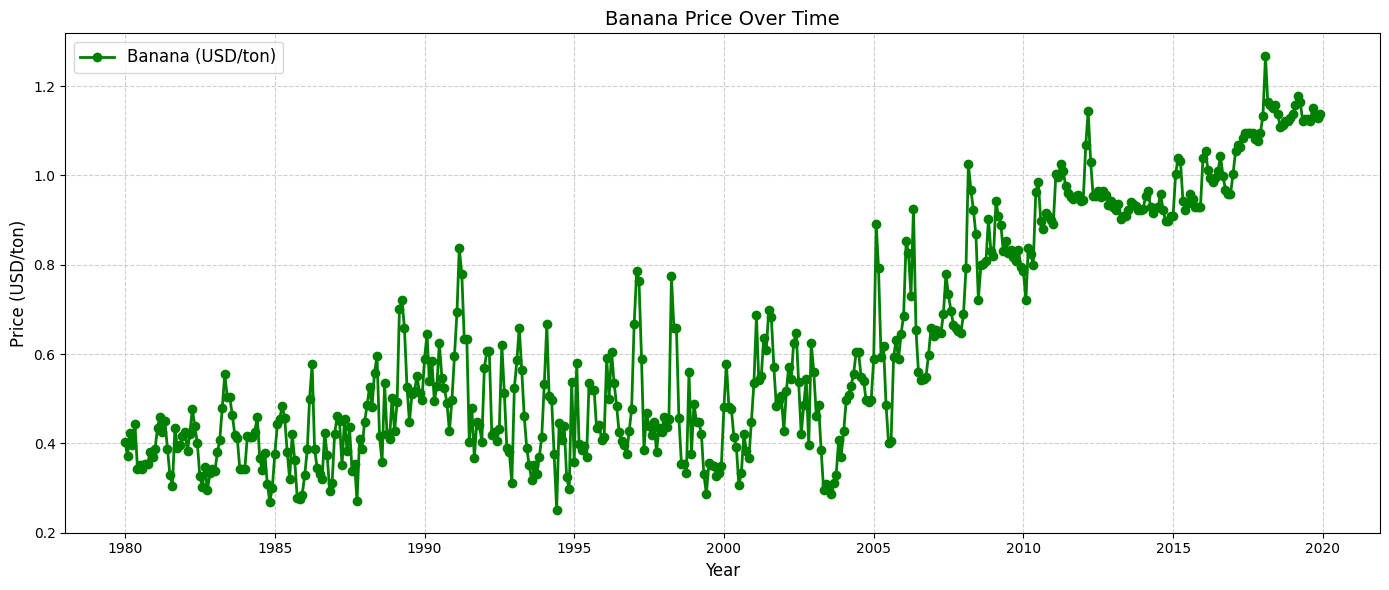

In [ ]:
# Upload the file manually
uploaded = files.upload()
file_path = "CMO-Historical-Data-Monthly-Final.xlsx"  # Ensure this matches the uploaded filename

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load the "Monthly Prices" sheet, skipping initial metadata rows
df_prices = pd.read_excel(xls, sheet_name="Monthly Prices", skiprows=0)

# Rename the first column to 'Date'
df_prices.rename(columns={df_prices.columns[0]: 'Date'}, inplace=True)

# Drop empty columns
df_prices.dropna(how='all', axis=1, inplace=True)

# Convert 'Date' column to datetime format
df_prices['Date'] = pd.to_datetime(df_prices['Date'], format='%YM%m', errors='coerce')

# Drop rows where 'Date' is NaT (invalid date)
df_prices.dropna(subset=['Date'], inplace=True)

# Set Date as the index
df_prices.set_index('Date', inplace=True)

# Convert Banana column to float if it exists
if 'Banana' in df_prices.columns:
    df_prices['Banana'] = df_prices['Banana'].astype(float)

# Select only Banana column for plotting
selected_columns = [col for col in df_prices.select_dtypes(include=['number']).columns
                   if isinstance(col, str) and 'Banana' in col]

# Plot Banana prices (absolute values, not normalized)
if len(selected_columns) > 0:
    plt.figure(figsize=(14, 6))

    col = selected_columns[0]  # Only Banana column

    # Extract commodity name and unit (if available)
    if '(' in col and ')' in col:
        commodity_name = col.split('(')[0].strip()
        unit = col.split('(')[1].split(')')[0].strip()
    else:
        commodity_name = col
        unit = "USD/ton"  # Default unit (adjust if needed)

    plt.plot(df_prices.index, df_prices[col], label=f'{commodity_name} ({unit})', color='green', linewidth=2,marker='o')

    plt.title('Banana Price Over Time', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(f'Price ({unit})', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()
else:
    print("Error: No Banana price data found in the dataset.")

Saving CMO-Historical-Data-Annual.xlsx to CMO-Historical-Data-Annual.xlsx


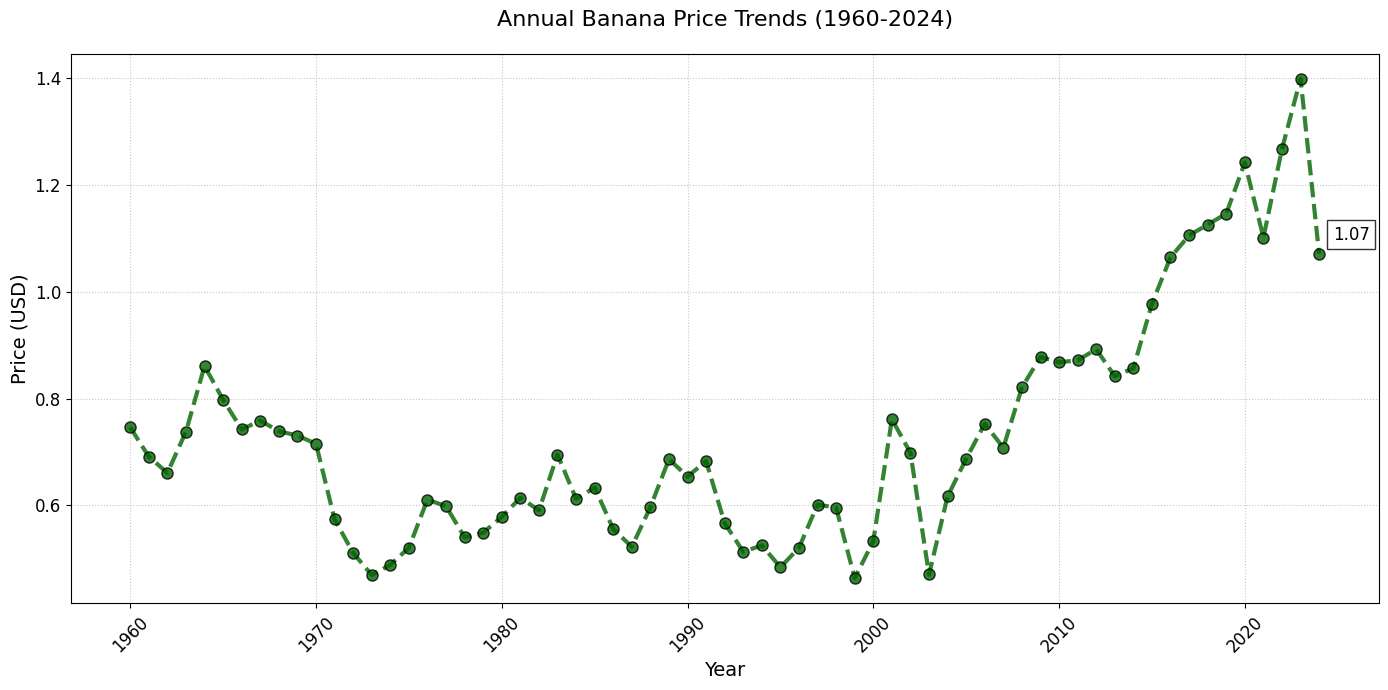


Basic Statistics:
count    65.000000
mean      0.730865
std       0.217428
min       0.463860
25%       0.574109
50%       0.687392
75%       0.841981
max       1.399272
Name: Banana, dtype: float64

Year-over-Year Change (%):
Year
1961-01-01    -7.36%
1962-01-01    -4.40%
1963-01-01    11.71%
1964-01-01    16.64%
1965-01-01    -7.35%
1966-01-01    -6.95%
1967-01-01     2.24%
1968-01-01    -2.65%
1969-01-01    -1.10%
1970-01-01    -2.11%
1971-01-01   -19.75%
1972-01-01   -10.99%
1973-01-01    -8.08%
1974-01-01     4.07%
1975-01-01     6.52%
1976-01-01    17.36%
1977-01-01    -2.06%
1978-01-01    -9.71%
1979-01-01     1.62%
1980-01-01     5.34%
1981-01-01     6.24%
1982-01-01    -3.87%
1983-01-01    17.69%
1984-01-01   -11.90%
1985-01-01     3.40%
1986-01-01   -12.22%
1987-01-01    -6.03%
1988-01-01    14.23%
1989-01-01    15.05%
1990-01-01    -4.72%
1991-01-01     4.40%
1992-01-01   -16.99%
1993-01-01    -9.48%
1994-01-01     2.34%
1995-01-01    -7.81%
1996-01-01     7.55%
1997-01-01 

In [ ]:
# Upload the file
uploaded = files.upload()
file_path = "CMO-Historical-Data-Annual.xlsx"  # Confirm filename matches

# Load and preprocess data
def load_annual_data(file_path):
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name="Sheet1", skiprows=0)  # Adjust sheet name if needed

    # Clean data
    df.rename(columns={df.columns[0]: 'Year'}, inplace=True)
    df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')  # Parse years
    df.dropna(subset=['Year'], inplace=True)
    df.set_index('Year', inplace=True)

    # Convert Banana column to numeric
    if 'Banana' in df.columns:
        df['Banana'] = pd.to_numeric(df['Banana'], errors='coerce')

    return df

df_annual = load_annual_data(file_path)

# Plotting function
def plot_annual_banana_prices(df, commodity='Banana'):
    if commodity not in df.columns:
        print(f"Error: '{commodity}' column not found in dataset.")
        return

    plt.figure(figsize=(14, 7))

    # Extract unit from column name (e.g., "Banana (USD/ton)")
    if '(' in commodity and ')' in commodity:
        commodity_name = commodity.split('(')[0].strip()
        unit = commodity.split('(')[1].split(')')[0].strip()
    else:
        commodity_name = commodity
        unit = "USD"  # Default unit

    # Plot with enhanced styling
    plt.plot(df.index, df[commodity],
             color='darkgreen',
             linewidth=3,
             marker='o',
             markersize=8,
             markeredgecolor='black',
             linestyle='--',
             alpha=0.8)

    # Formatting
    plt.title(f'Annual {commodity_name} Price Trends ({df.index.min().year}-{df.index.max().year})',
              fontsize=16, pad=20)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(f'Price ({unit})', fontsize=14)
    plt.grid(True, linestyle=':', alpha=0.7)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    # Add data labels for last point
    last_point = df[commodity].iloc[-1]
    plt.annotate(f'{last_point:.2f}',
                 xy=(df.index[-1], last_point),
                 xytext=(10, 10),
                 textcoords='offset points',
                 fontsize=12,
                 bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

# Execute plotting
plot_annual_banana_prices(df_annual)

# Optional: Basic Time Series Analysis
if 'Banana' in df_annual.columns:
    print("\nBasic Statistics:")
    print(df_annual['Banana'].describe())

    # Calculate annual percentage change
    df_annual['YoY_Change'] = df_annual['Banana'].pct_change() * 100
    print("\nYear-over-Year Change (%):")
    print(df_annual['YoY_Change'].dropna().to_string(float_format="%.2f%%"))

Saving CMO-Historical-Data-Monthly-Final.xlsx to CMO-Historical-Data-Monthly-Final (1).xlsx


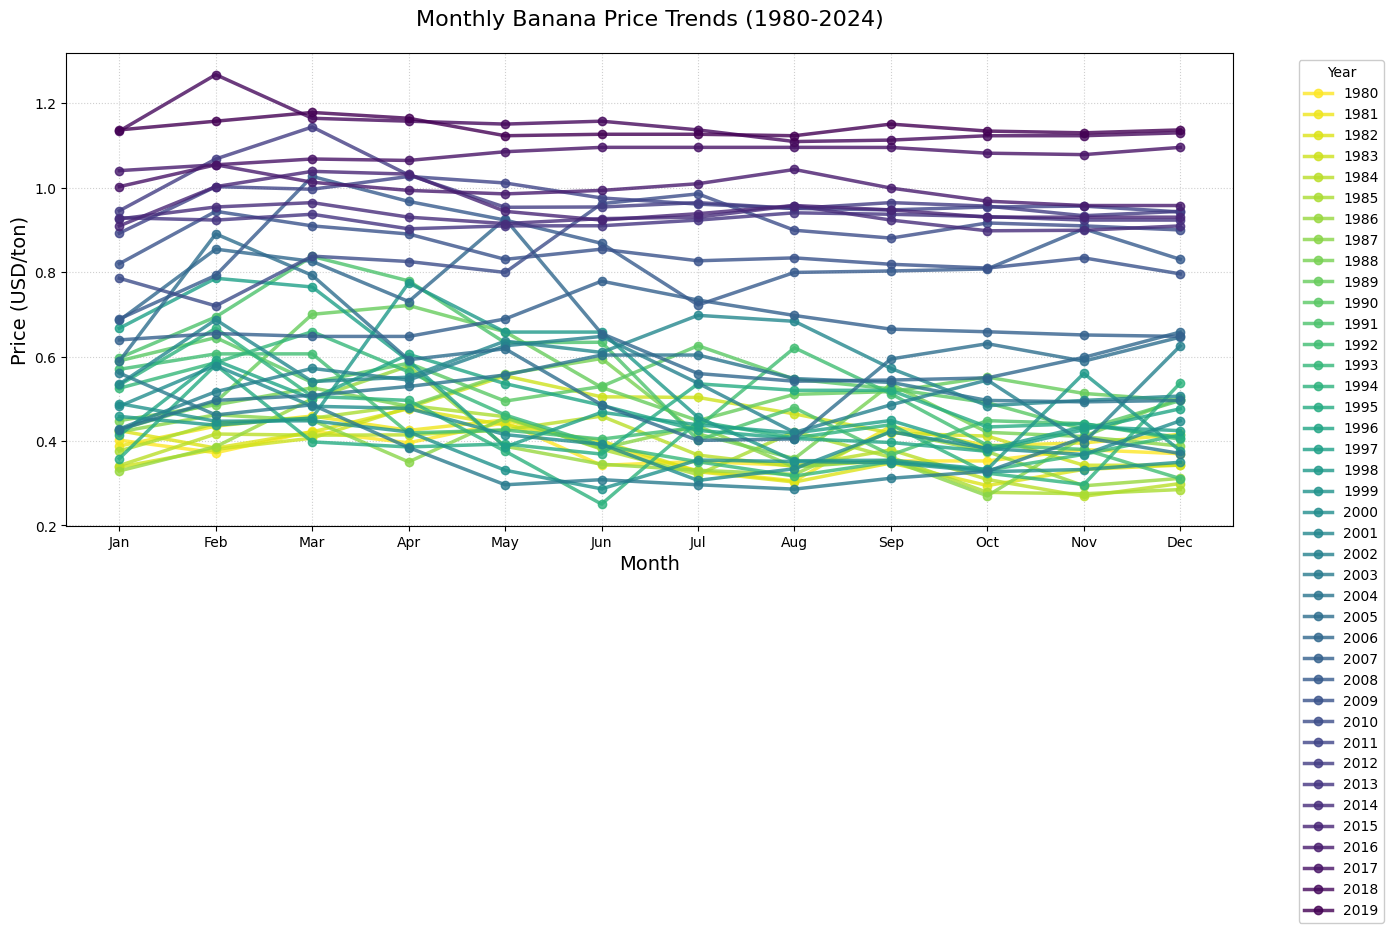

In [ ]:

# Upload the file
uploaded = files.upload()
file_path = "CMO-Historical-Data-Monthly-Final.xlsx"  # Confirm filename

# Load and preprocess data
def load_monthly_data(file_path):
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name="Monthly Prices", skiprows=0)

    # Clean data
    df.rename(columns={df.columns[0]: 'Date'}, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], format='%YM%m', errors='coerce')
    df.dropna(subset=['Date'], inplace=True)
    df.set_index('Date', inplace=True)

    # Convert Banana column to numeric
    if 'Banana' in df.columns:
        df['Banana'] = pd.to_numeric(df['Banana'], errors='coerce')

    return df

df_monthly = load_monthly_data(file_path)

# Filter for 2014-2024 and prepare for plotting
def prepare_annual_lines(df, commodity='Banana'):
    if commodity not in df.columns:
        raise ValueError(f"Column '{commodity}' not found in data")

    # Extract 2014-2024 data
    df = df.loc['1980':'2024', [commodity]].copy()
    df['Year'] = df.index.year
    df['Month'] = df.index.month

    # Pivot to have years as columns
    annual_lines = df.pivot_table(index='Month',
                                columns='Year',
                                values=commodity)
    return annual_lines

annual_lines = prepare_annual_lines(df_monthly)

# Plotting with enhanced styling
plt.figure(figsize=(14, 8))

# Color palette for years
colors = plt.cm.viridis_r(np.linspace(0, 1, len(annual_lines.columns)))

for i, year in enumerate(annual_lines.columns):
    plt.plot(annual_lines.index,
             annual_lines[year],
             label=year,
             color=colors[i],
             linewidth=2.5,
             marker='o',
             markersize=6,
             alpha=0.8)

# Formatting
plt.title('Monthly Banana Price Trends (1980-2024)', fontsize=16, pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Price (USD/ton)', fontsize=14)  # Adjust unit if needed
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun',
                        'Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True, linestyle=':', alpha=0.6)

# Legend outside plot
plt.legend(title='Year',
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           framealpha=1)

plt.tight_layout()
plt.show()

# Decomposition


Seasonal Decomposition for Banana


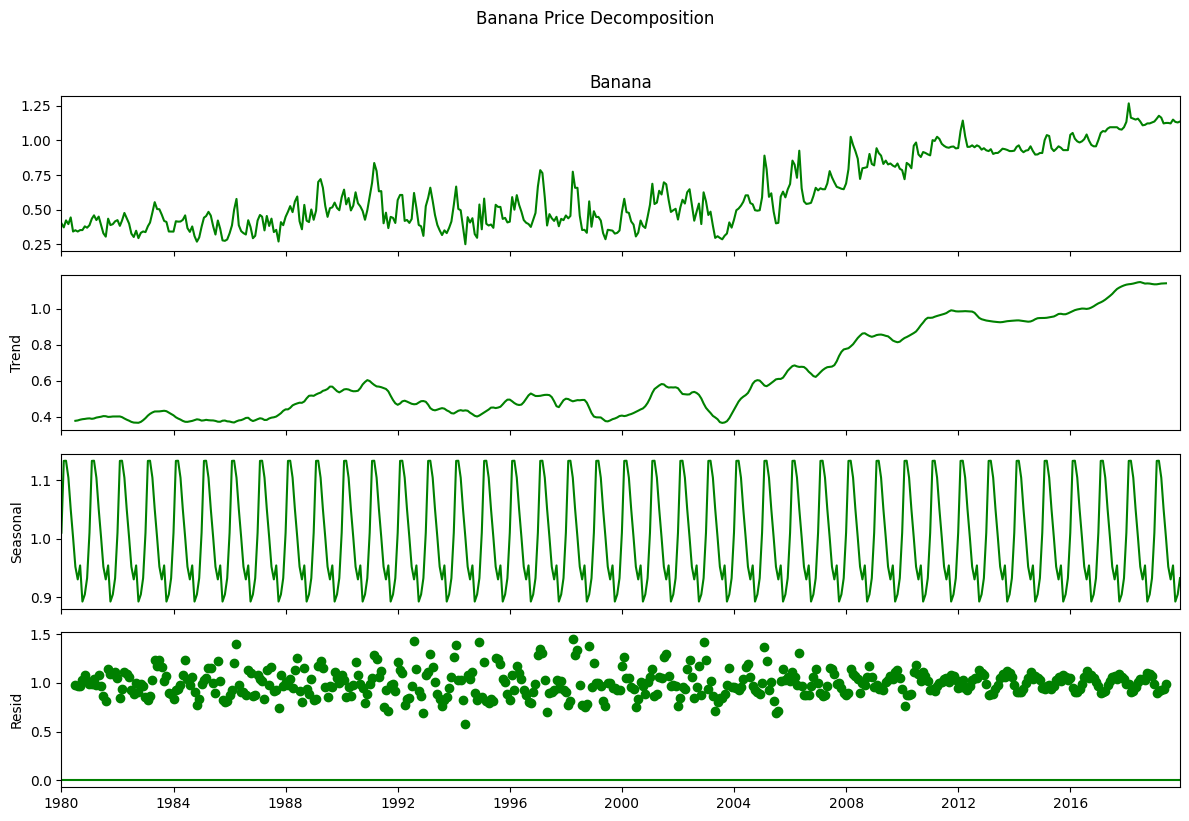


Stationarity Check and Differencing for Banana


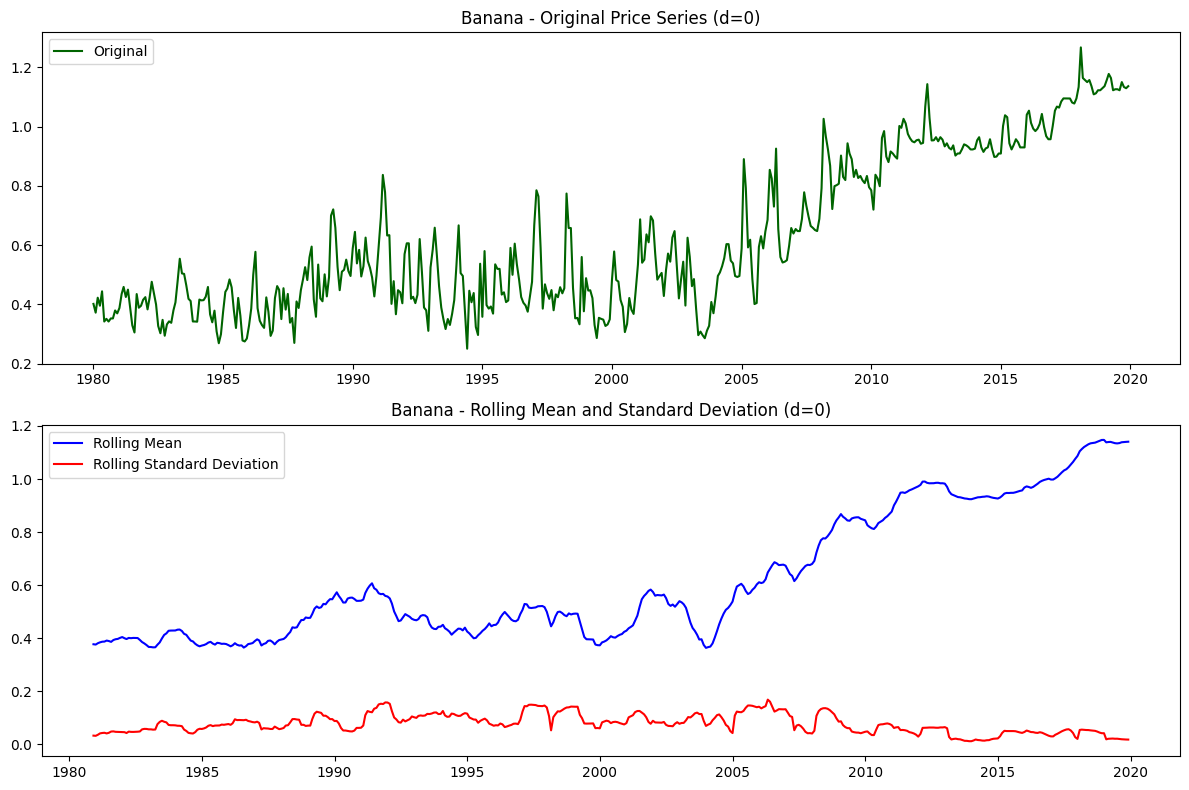


ADF Statistic (d=0): -0.14092597147213123
p-value: 0.9452064782302046
Critical Values:
   1%: -3.4443401584716296
   5%: -2.867709127168354
   10%: -2.5700559076505205

Series is non-stationary. Applying differencing (d=1)...


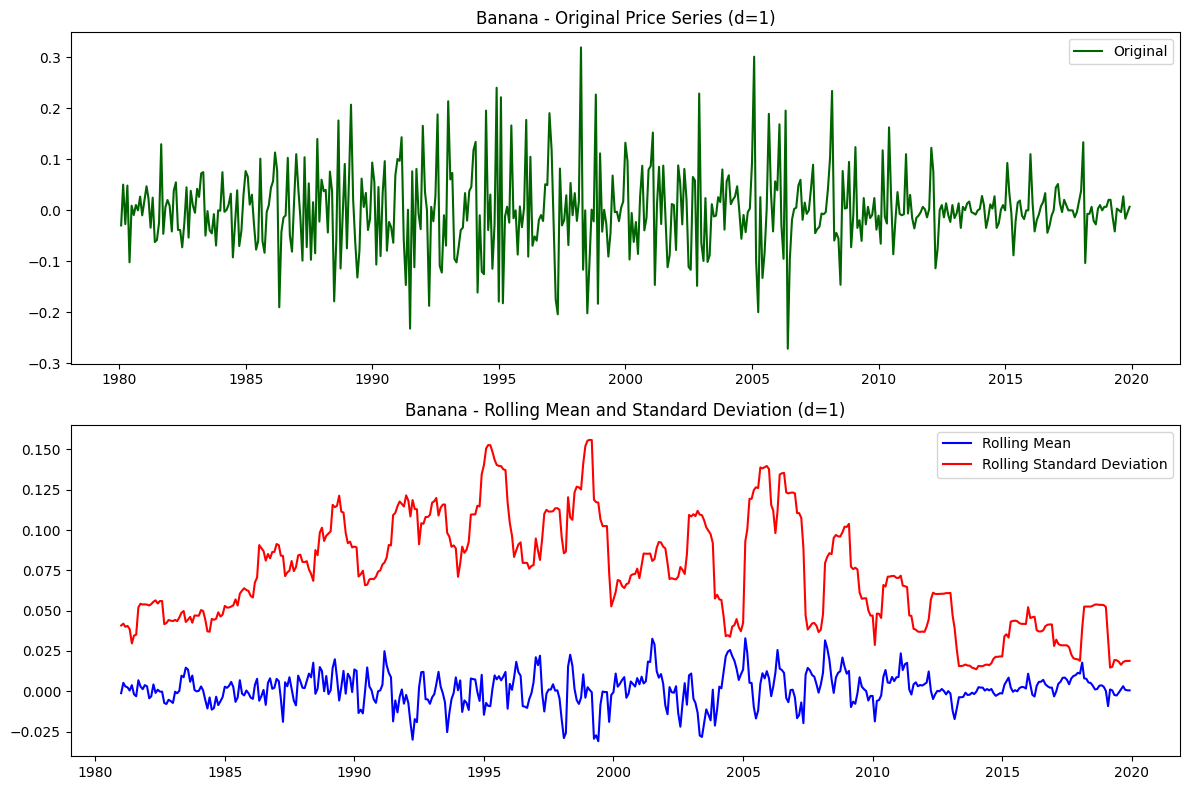


ADF Statistic (d=1): -13.641914573069588
p-value: 1.6469369301394105e-25
Critical Values:
   1%: -3.4443401584716296
   5%: -2.867709127168354
   10%: -2.5700559076505205

Series is stationary after differencing 1 times.


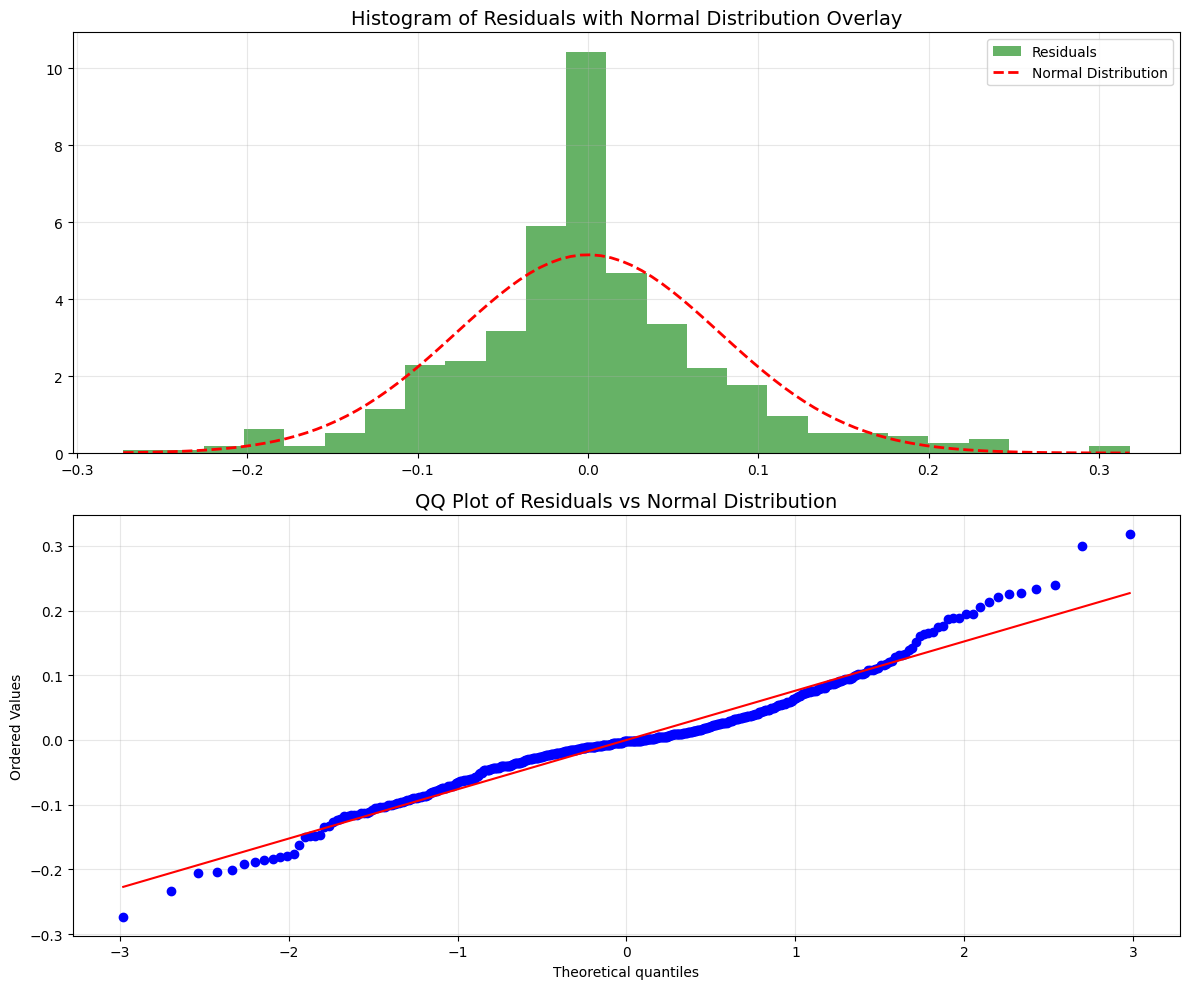


ACF and PACF Plots for Banana


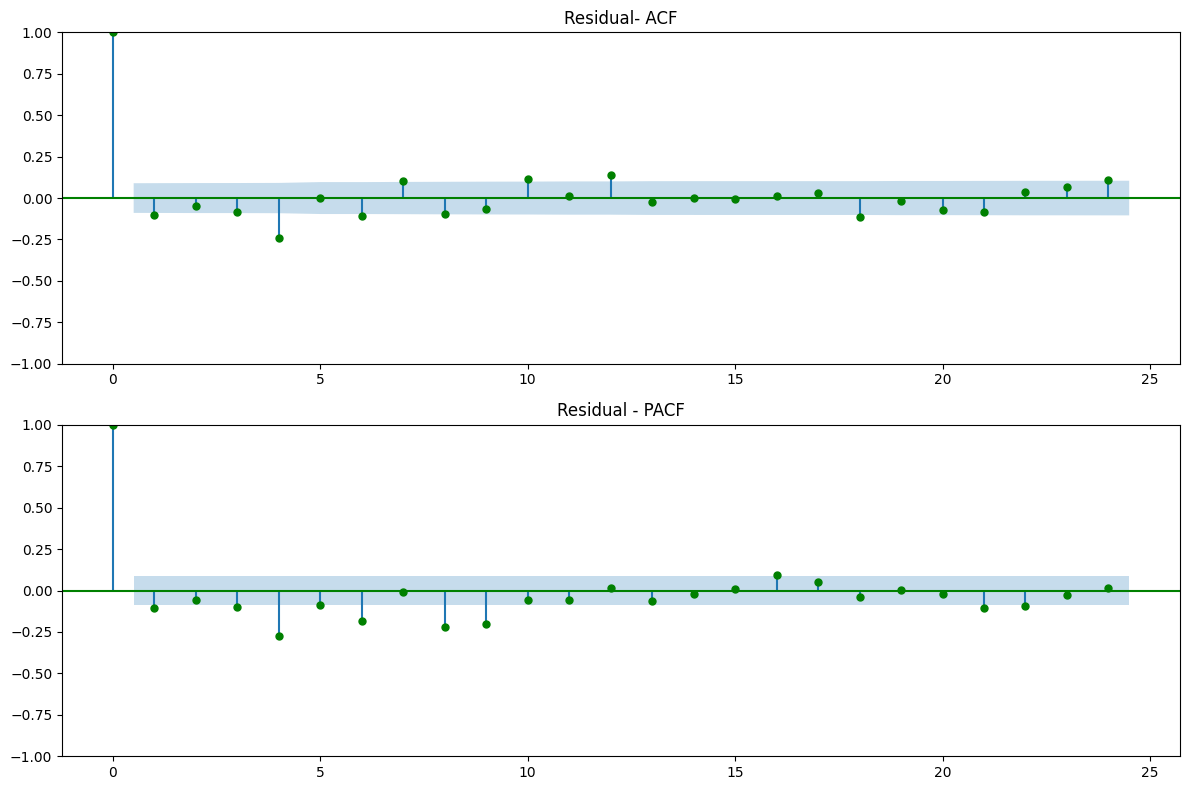


ACF and PACF Plots for Banana


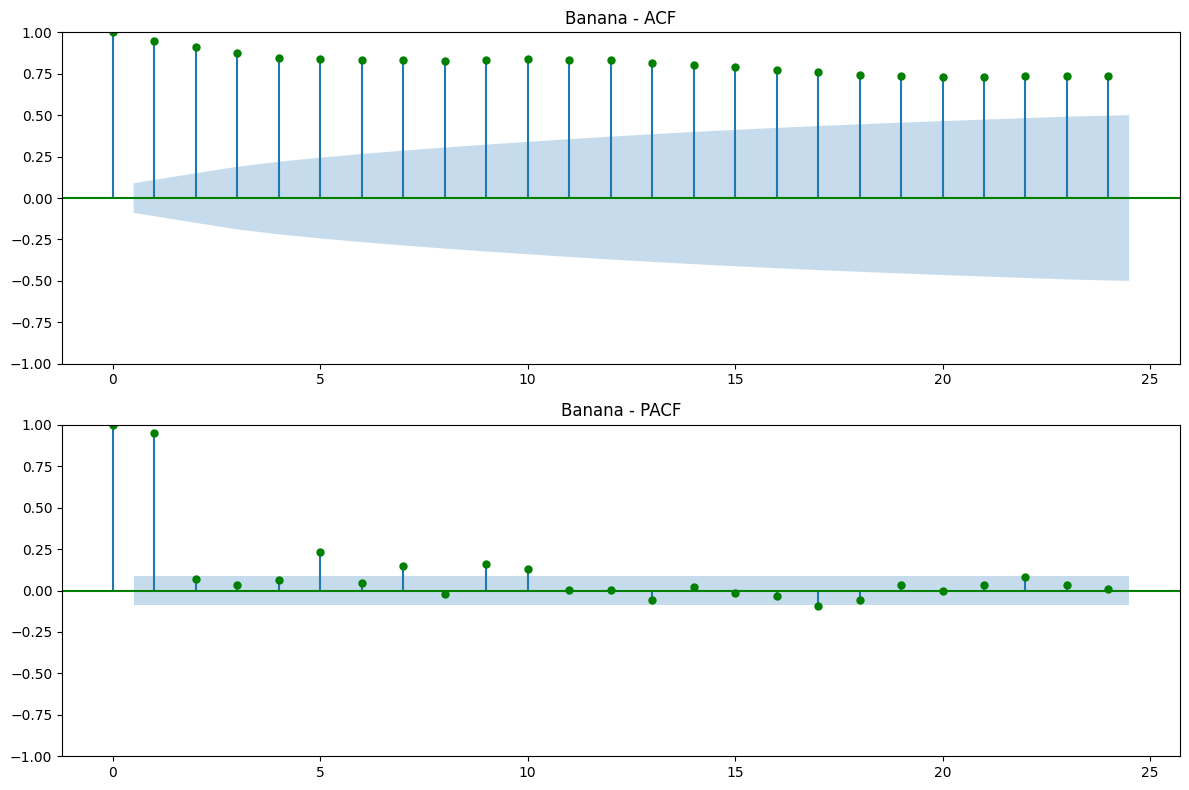


Model Selection for Banana
Series is non-stationary. Consider ARIMA or SARIMA with differencing.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the Excel file
xls = pd.ExcelFile("CMO-Historical-Data-Monthly-Final.xlsx")

# Load the "Monthly Prices" sheet, skipping initial metadata rows
df_prices = pd.read_excel(xls, sheet_name="Monthly Prices", skiprows=0)

# Rename the first column to 'Date'
df_prices.rename(columns={df_prices.columns[0]: 'Date'}, inplace=True)

# Drop empty columns
df_prices.dropna(how='all', axis=1, inplace=True)

# Convert 'Date' column to datetime format
df_prices['Date'] = pd.to_datetime(df_prices['Date'], format='%YM%m', errors='coerce')

# Drop rows where 'Date' is NaT (invalid date)
df_prices.dropna(subset=['Date'], inplace=True)

# Set Date as the index
df_prices.set_index('Date', inplace=True)

# Focus on 'Banana'
commodity = 'Banana'
series = df_prices[commodity].dropna()

### 1. Seasonal Decomposition
print(f"\n{'='*50}\nSeasonal Decomposition for {commodity}\n{'='*50}")
decomposition = seasonal_decompose(series, model='multiplicative', period=12)

# Customize decomposition plot colors
fig = decomposition.plot()
fig.set_size_inches(12, 8)
fig.suptitle(f'{commodity} Price Decomposition', y=1.02)

# Set colors to green tones
for ax in fig.axes:
    for line in ax.get_lines():
        line.set_color('green')

plt.tight_layout()
plt.show()

### 2. Stationarity Check Using Rolling Statistics and Differencing
print(f"\n{'='*50}\nStationarity Check and Differencing for {commodity}\n{'='*50}")
differenced_series = series.copy()
d = 0

while True:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    # Original Series
    ax1.plot(differenced_series, label='Original', color='darkgreen')
    ax1.set_title(f'{commodity} - Original Price Series (d={d})')
    ax1.legend()

    # Rolling Mean and Standard Deviation
    series_rolling_mean = differenced_series.rolling(window=12).mean()
    series_rolling_std = differenced_series.rolling(window=12).std()

    ax2.plot(series_rolling_mean, label='Rolling Mean', color='blue')
    ax2.plot(series_rolling_std, label='Rolling Standard Deviation', color='red')
    ax2.legend()
    ax2.set_title(f'{commodity} - Rolling Mean and Standard Deviation (d={d})')

    plt.tight_layout()
    plt.show()

    # Perform ADF Test
    result = adfuller(differenced_series.dropna())
    print(f'\nADF Statistic (d={d}):', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for k, v in result[4].items():
        print(f'   {k}: {v}')

    if result[1] <= 0.05:
        print(f"\nSeries is stationary after differencing {d} times.")
        break
    else:
        print(f"\nSeries is non-stationary. Applying differencing (d={d+1})...")
        differenced_series = differenced_series.diff().dropna()
        d += 1

# Get residuals (assuming differenced_series is your d=1 differenced time series)
residuals = differenced_series - differenced_series.mean()

# Ensure residuals are numeric and contain no NaNs or infinities
residuals = residuals.dropna().astype(float)
residuals = residuals[np.isfinite(residuals)]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# 1. Histogram with normal distribution overlay
# ==============================================
ax1.hist(residuals, bins=25, density=True, alpha=0.6, color='green', label='Residuals')

# Calculate mean and standard deviation for normal distribution
mu, sigma = np.mean(residuals), np.std(residuals)
x = np.linspace(min(residuals), max(residuals), 100)
norm_pdf = stats.norm.pdf(x, mu, sigma)

# Add normal distribution as dotted red line
ax1.plot(x, norm_pdf, 'r--', linewidth=2, label='Normal Distribution')
ax1.set_title('Histogram of Residuals with Normal Distribution Overlay', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend()

# 2. QQ plot
# ==========
# Create QQ plot on second subplot
if len(np.unique(residuals)) > 1:
    stats.probplot(residuals, dist="norm", plot=ax2)
    ax2.set_title('QQ Plot of Residuals vs Normal Distribution', fontsize=14)
    ax2.grid(True, alpha=0.3)
else:
    print("Warning: Residuals are degenerate (all the same value). QQ plot cannot be created.")

plt.tight_layout()
plt.show()

### 3. ACF and PACF Plots
print(f"\n{'='*50}\nACF and PACF Plots for {commodity}\n{'='*50}")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF
plot_acf(differenced_series.dropna(), ax=ax1, lags=24, color='green')
ax1.set_title(f'Residual- ACF')

# PACF
plot_pacf(differenced_series.dropna(), ax=ax2, lags=24, method='ywm', color='green')
ax2.set_title(f'Residual - PACF')

plt.tight_layout()
plt.show()

### 3. ACF and PACF Plots
print(f"\n{'='*50}\nACF and PACF Plots for {commodity}\n{'='*50}")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF
plot_acf(series.dropna(), ax=ax1, lags=24, color='green')
ax1.set_title(f'{commodity} - ACF')

# PACF
plot_pacf(series.dropna(), ax=ax2, lags=24, method='ywm', color='green')
ax2.set_title(f'{commodity} - PACF')

plt.tight_layout()
plt.show()

### 4. Model Selection
print(f"\n{'='*50}\nModel Selection for {commodity}\n{'='*50}")

# If ACF and PACF suggest a random walk (e.g., ACF decays slowly, PACF cuts off after lag 1),
# consider using ARIMA(1,1,0) or SARIMA with differencing.
if d > 0:
    print("Series is non-stationary. Consider ARIMA or SARIMA with differencing.")
else:
    print("Series is stationary. Consider ARIMA without differencing or Exponential Smoothing.")







# Model Selection

In [ ]:
!pip install statsmodels
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
banana_decompose = decomposition.resid
banana_decompose.dropna(inplace=True)

cutoff = round(banana_decompose.shape[0]*0.8)
cutoff

# Define train and test sets according to the index found above
train = banana_decompose[:cutoff]

test = banana_decompose[cutoff:]

In [ ]:
# Load the Excel file
xls = pd.ExcelFile("CMO-Historical-Data-Monthly-Final.xlsx")

# Load the "Monthly Prices" sheet, skipping initial metadata rows
df_prices = pd.read_excel(xls, sheet_name="Monthly Prices", skiprows=0)

# Rename the first column to 'Date'
df_prices.rename(columns={df_prices.columns[0]: 'Date'}, inplace=True)

# Drop empty columns
df_prices.dropna(how='all', axis=1, inplace=True)

# Convert 'Date' column to datetime format
df_prices['Date'] = pd.to_datetime(df_prices['Date'], format='%YM%m', errors='coerce')

# Drop rows where 'Date' is NaT (invalid date)
df_prices.dropna(subset=['Date'], inplace=True)

# Set Date as the index
df_prices.set_index('Date', inplace=True)

# Focus on 'Banana'
commodity = 'Banana'
series = df_prices[commodity].dropna()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit an ARIMA(0,1,0) model
RandWalk = ARIMA(train, order=(0,1,0)).fit()

# Print out summary information on the fit
print(RandWalk.summary())

from sklearn.metrics import mean_squared_error
import numpy as np

# Predict using Random Walk model
y_hat_rw = RandWalk.predict(typ='levels')

# Calculate RMSE manually
RandWalk_rmse = np.sqrt(mean_squared_error(train, y_hat_rw))

print(f"\nRandom Walk RMSE: {RandWalk_rmse:.4f}")

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                  374
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 145.077
Date:                Thu, 01 May 2025   AIC                           -288.153
Time:                        14:25:38   BIC                           -284.232
Sample:                    07-01-1980   HQIC                          -286.596
                         - 08-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0269      0.001     18.805      0.000       0.024       0.030
Ljung-Box (L1) (Q):                  18.67   Jarque-Bera (JB):                64.86
Prob(Q):                              0.00   Pr

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
import numpy as np

AR1 = ARIMA(train, order=(1,0,0)).fit()

# Print out summary information on the fit
print(AR1.summary())


# Predictions from AR(1) model
y_hat_ar1 = AR1.predict(typ='levels')

# Calculate RMSE manually
AR1_rmse = np.sqrt(mean_squared_error(train, y_hat_ar1))

print(f"\nAR(1) RMSE: {AR1_rmse:.4f}")

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                  374
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 217.044
Date:                Thu, 01 May 2025   AIC                           -428.088
Time:                        14:25:42   BIC                           -416.315
Sample:                    07-01-1980   HQIC                          -423.414
                         - 08-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9979      0.012     82.944      0.000       0.974       1.022
ar.L1          0.3659      0.045      8.161      0.000       0.278       0.454
sigma2         0.0183      0.001     15.171      0.0

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit an ARMA(0,0,10) model

MA1 = ARIMA(train, order=(0,0,1)).fit()

# Print out summary information on the fit
print(MA1.summary())

#Root Mean Square Error(RMSE) For our MA(1) model
y_hat_ma1 = MA1.predict(typ='levels')

MA1_rmse = mean_squared_error(train, y_hat_ma1)

print(f"\nMA(1) RMSE: {MA1_rmse:.4f}")


                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                  374
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 216.860
Date:                Thu, 01 May 2025   AIC                           -427.719
Time:                        14:25:46   BIC                           -415.946
Sample:                    07-01-1980   HQIC                          -423.045
                         - 08-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9979      0.010     96.884      0.000       0.978       1.018
ma.L1          0.3581      0.041      8.681      0.000       0.277       0.439
sigma2         0.0184      0.001     15.175      0.0

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit an ARMA(1,0,1) model
ARIMA414 = ARIMA(train, order=(4,1,4)).fit()

# Print out summary information on the fit
print(ARIMA414.summary())

y_hat_arima414 = ARIMA414.predict(typ='levels')

ARIMA414_rmse = mean_squared_error(train, y_hat_arima414)

print(f"\nARIMA(4,1,4) RMSE: {ARIMA414_rmse:.4f}")


                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                  374
Model:                 ARIMA(4, 1, 4)   Log Likelihood                 263.611
Date:                Thu, 01 May 2025   AIC                           -509.223
Time:                        14:26:02   BIC                           -473.929
Sample:                    07-01-1980   HQIC                          -495.208
                         - 08-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0207      0.328      0.063      0.950      -0.623       0.664
ar.L2          0.7916      0.084      9.418      0.000       0.627       0.956
ar.L3         -0.3546      0.221     -1.606      0.1

In [ ]:
#Comparison of Models RMSE and AIC
print("MODEL | RMSE| AIC")
print(('AR1', AR1_rmse, AR1.aic))
print(('MA1', MA1_rmse, MA1.aic))
print(('ARIMA414', ARIMA414_rmse, ARIMA414.aic))
# print(('ARIMA401', ARIMA401_rmse, ARIMA401.aic))

MODEL | RMSE| AIC
('AR1', np.float64(0.13540846110161836), np.float64(-428.0882629361199))
('MA1', 0.01835387557816783, np.float64(-427.719184659962))
('ARIMA414', 0.016557719579894933, np.float64(-509.2228703835408))


                               SARIMAX Results                                
Dep. Variable:                 Banana   No. Observations:                  480
Model:                 ARIMA(4, 1, 4)   Log Likelihood                 593.662
Date:                Thu, 01 May 2025   AIC                          -1169.323
Time:                        14:26:12   BIC                          -1131.778
Sample:                    01-01-1980   HQIC                         -1154.564
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0663      0.130      0.508      0.612      -0.190       0.322
ar.L2          0.8194      0.122      6.724      0.000       0.581       1.058
ar.L3         -0.0294      0.122     -0.241      0.8

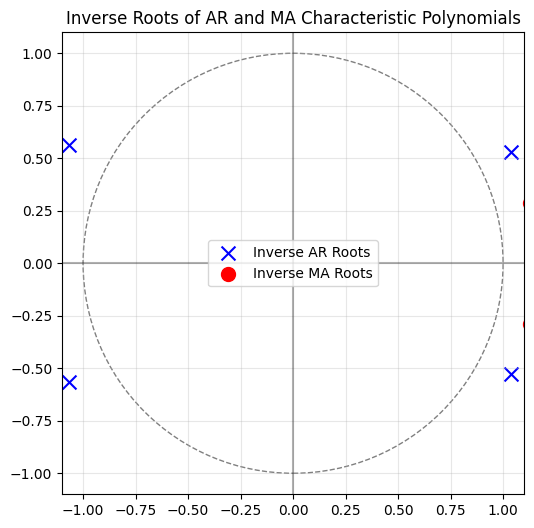

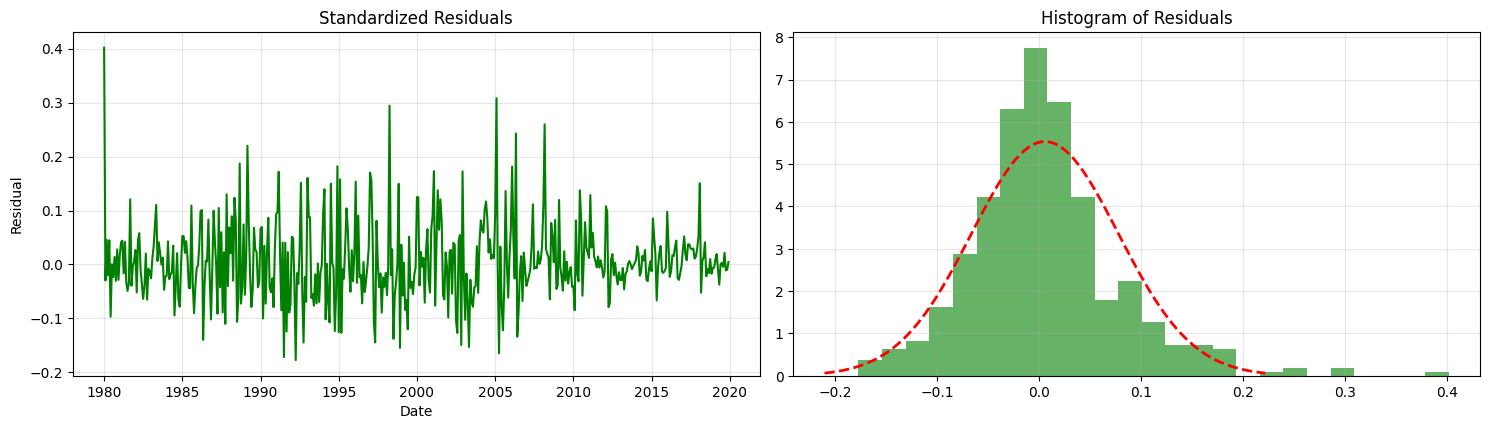

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from numpy.polynomial import Polynomial

# Either load your banana price data or use this as an example
# Assuming 'series' is your banana price time series
# If you don't have data, uncomment these lines to generate sample data
'''
np.random.seed(42)
date_rng = pd.date_range(start='1980-01-01', end='2020-01-01', freq='MS')
n = len(date_rng)
trend = np.linspace(0.8, 1.05, n) + 0.1 * np.sin(np.linspace(0, 24*np.pi, n))
noise_vol = np.concatenate([
    np.linspace(0.03, 0.15, n//2),
    np.linspace(0.15, 0.05, n - n//2)
])
noise = np.array([np.random.normal(0, vol) for vol in noise_vol])
series = pd.Series(trend + noise, index=date_rng)
'''

# Fit ARIMA(4,1,4) model
series = pd.to_numeric(series, errors='coerce')
model = ARIMA(series, order=(4, 1, 4))
results = model.fit()

# Print model summary
print(results.summary())

# Extract coefficients
ar_params = results.arparams
ma_params = results.maparams
print("\nAR Coefficients (φ1, φ2, φ3, φ4):")
for i, param in enumerate(ar_params):
    print(f"φ{i+1} = {param:.4f}")

print("\nMA Coefficients (θ1, θ2, θ3, θ4):")
for i, param in enumerate(ma_params):
    print(f"θ{i+1} = {param:.4f}")

# Get the constant term (if any)
if hasattr(results, 'params') and 'const' in results.param_names:
    const_index = results.param_names.index('const')
    const = results.params[const_index]
    print(f"\nConstant term (μ): {const:.4f}")

# Check stationarity and invertibility
print("\nChecking stationarity and invertibility:")

# Construct AR polynomial: 1 - φ1*z - φ2*z^2 - φ3*z^3 - φ4*z^4
ar_poly = np.r_[1, -ar_params]  # Prepend 1 and negate AR coefficients
ar_roots = np.roots(ar_poly)
print("\nAR polynomial roots (for stationarity):")
for root in ar_roots:
    modulus = abs(root)
    status = "Stationary" if modulus > 1 else "Non-stationary"
    print(f"Root: {root:.4f}, Modulus: {modulus:.4f}, Status: {status}")

# Construct MA polynomial: 1 + θ1*z + θ2*z^2 + θ3*z^3 + θ4*z^4
ma_poly = np.r_[1, ma_params]  # Prepend 1 to MA coefficients
ma_roots = np.roots(ma_poly)
print("\nMA polynomial roots (for invertibility):")
for root in ma_roots:
    modulus = abs(root)
    status = "Invertible" if modulus > 1 else "Non-invertible"
    print(f"Root: {root:.4f}, Modulus: {modulus:.4f}, Status: {status}")

# Plot inverse AR and MA roots to check if they lie within the unit circle
# This is an alternative way to verify stationarity and invertibility
plt.figure(figsize=(12, 6))

# Plot unit circle
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
plt.gca().add_patch(circle)

# Plot inverse AR roots
if len(ar_params) > 0:
    inverse_ar_roots = 1 / ar_roots
    plt.scatter(inverse_ar_roots.real, inverse_ar_roots.imag, color='blue', marker='x',
                s=100, label='Inverse AR Roots')

# Plot inverse MA roots
if len(ma_params) > 0:
    inverse_ma_roots = 1 / ma_roots
    plt.scatter(inverse_ma_roots.real, inverse_ma_roots.imag, color='red', marker='o',
                s=100, label='Inverse MA Roots')

plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.gca().set_aspect('equal')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid(True, alpha=0.3)
plt.title('Inverse Roots of AR and MA Characteristic Polynomials')
plt.legend()
plt.show()

# Plot diagnostic plots for the residuals
fig = plt.figure(figsize=(15, 12))

# Standardized residual plot
ax1 = fig.add_subplot(321)
ax1.plot(results.resid, color='green')
ax1.set_title('Standardized Residuals')
ax1.set_xlabel('Date')
ax1.set_ylabel('Residual')
ax1.grid(True, alpha=0.3)

# Histogram of residuals with normal curve
ax2 = fig.add_subplot(322)
residuals = results.resid
ax2.hist(residuals, bins=25, density=True, alpha=0.6, color='green')
mu, sigma = np.mean(residuals), np.std(residuals)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax2.plot(x, stats.norm.pdf(x, mu, sigma), 'r--', linewidth=2)

ax2.set_title('Histogram of Residuals')
ax2.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model (example: ARIMA(4,1,4))
model = ARIMA(series.diff().dropna(), order=(4, 1, 4))
results = model.fit()

# Extract μ (constant term)
if 'const' in results.param_names:
    mu_index = results.param_names.index('const')
    mu = results.params[mu_index]
    print(f"Estimated μ (constant term): {mu:.4f}")
else:
    print("No constant term (μ) included in this ARIMA model.")


No constant term (μ) included in this ARIMA model.


AR parameters (φ): [ 0.08695966 -0.15939507  0.42452644 -0.13122313]
MA parameters (θ): [-0.86999486  0.28002281 -0.48778253  0.40019241]
Constant (μ): 0


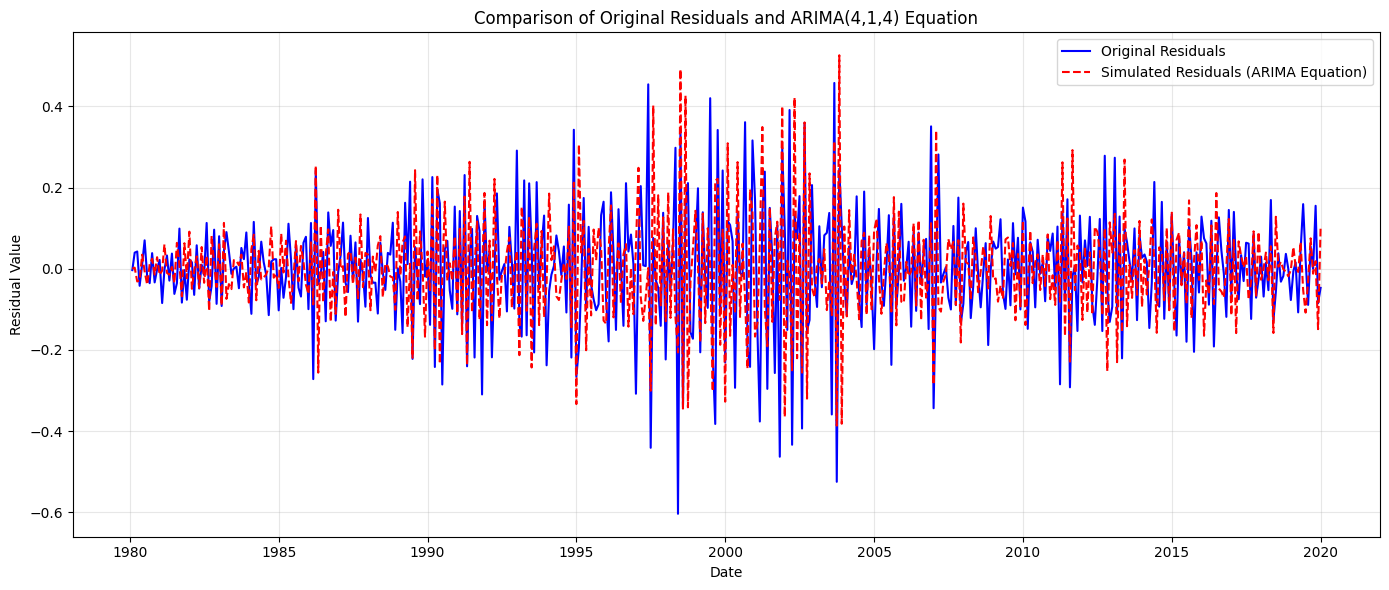

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'series' is your banana price time series
# If you don't have it loaded, use this code to generate sample data
np.random.seed(42)
date_rng = pd.date_range(start='1980-01-01', end='2020-01-01', freq='MS')
n = len(date_rng)
trend = np.linspace(0.8, 1.05, n) + 0.1 * np.sin(np.linspace(0, 24*np.pi, n))
noise_vol = np.concatenate([
    np.linspace(0.03, 0.15, n//2),
    np.linspace(0.15, 0.05, n - n//2)
])
noise = np.array([np.random.normal(0, vol) for vol in noise_vol])
series = pd.Series(trend + noise, index=date_rng)

# Fit ARIMA(4,1,4) model
model = ARIMA(series, order=(4, 1, 4))
results = model.fit()

# Extract coefficients
ar_params = results.arparams  # φ1, φ2, φ3, φ4
ma_params = results.maparams  # θ1, θ2, θ3, θ4
mu = results.params.get('const', 0)  # μ (constant term)

print(f"AR parameters (φ): {ar_params}")
print(f"MA parameters (θ): {ma_params}")
print(f"Constant (μ): {mu}")

# Calculate original residuals (differenced series - mean)
differenced_series = series.diff().dropna()
original_residuals = differenced_series - differenced_series.mean()

# Simulate residuals using the ARIMA equation
# (1−φ₁B−φ₂B²−φ₃B³−φ₄B⁴)(1−B)Xₜ = μ + (1+θ₁B+θ₂B²+θ₃B³+θ₄B⁴)ϵₜ
simulated_residuals = []
for t in range(len(original_residuals)):
    # Calculate AR terms
    ar_term = 0
    for i in range(len(ar_params)):
        if t-i-1 >= 0:  # Ensure we have enough history
            ar_term += ar_params[i] * original_residuals.iloc[t-i-1]

    # Calculate MA terms
    ma_term = 0
    for i in range(len(ma_params)):
        if t-i-1 >= 0:  # Ensure we have enough history
            ma_term += ma_params[i] * original_residuals.iloc[t-i-1]

    # Combine according to ARIMA equation
    simulated_residuals.append(mu + ar_term + ma_term)

simulated_residuals = pd.Series(simulated_residuals, index=original_residuals.index)

# Create comparison plot
plt.figure(figsize=(14, 6))
plt.plot(original_residuals, label='Original Residuals', color='blue')
plt.plot(simulated_residuals, label='Simulated Residuals (ARIMA Equation)',
         color='red', linestyle='--')
plt.title('Comparison of Original Residuals and ARIMA(4,1,4) Equation')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Saving CMO-Historical-Data-Monthly-Final.xlsx to CMO-Historical-Data-Monthly-Final (6).xlsx
                               SARIMAX Results                                
Dep. Variable:                 Banana   No. Observations:                  480
Model:                 ARIMA(4, 1, 4)   Log Likelihood                 593.662
Date:                Thu, 01 May 2025   AIC                          -1169.323
Time:                        14:41:07   BIC                          -1131.778
Sample:                    01-01-1980   HQIC                         -1154.564
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0663      0.130      0.508      0.612      -0.190       0.322
ar.L2          0.8194      0.122      6

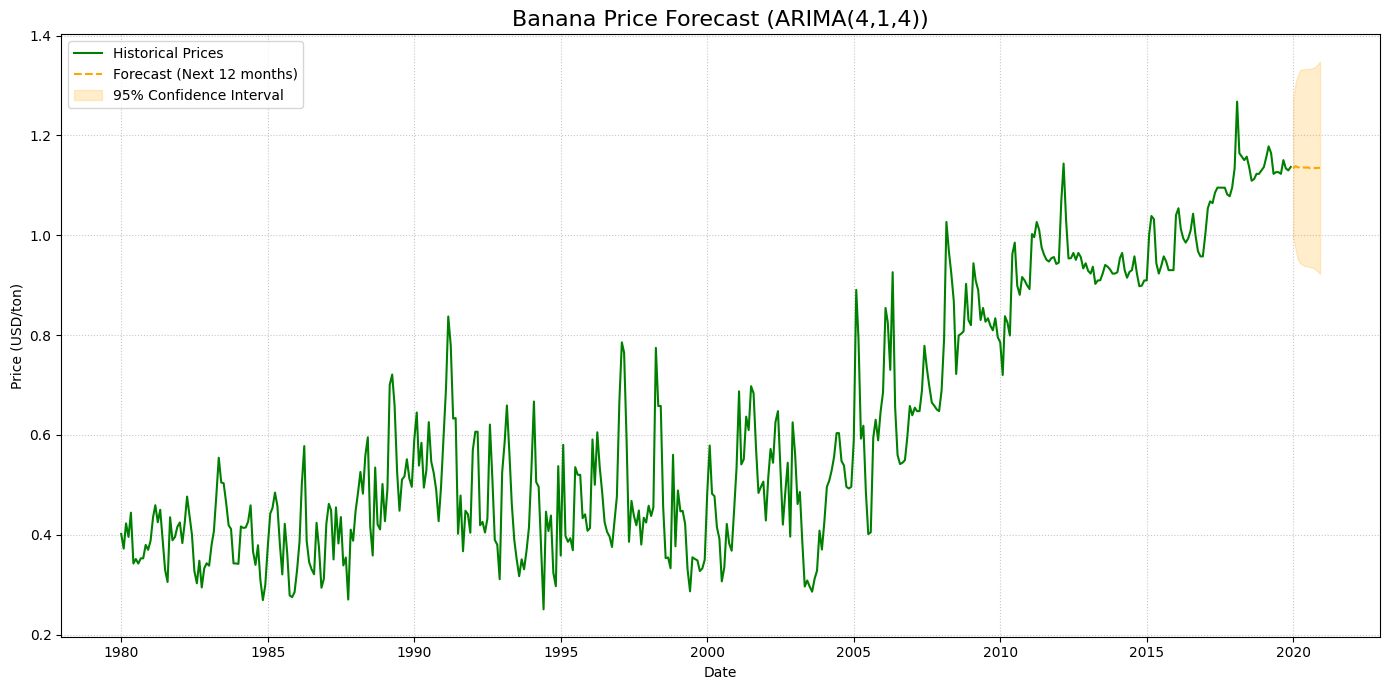


Forecasted Banana Prices for Next 12 Months:
            Forecast  Lower CI  Upper CI
2020-01-01  1.134147  0.997461  1.270834
2020-02-01  1.138497  0.970599  1.306395
2020-03-01  1.135657  0.950680  1.320633
2020-04-01  1.137252  0.942969  1.331536
2020-05-01  1.136228  0.940540  1.331915
2020-06-01  1.135343  0.937860  1.332825
2020-07-01  1.135839  0.938200  1.333478
2020-08-01  1.134367  0.935764  1.332970
2020-09-01  1.135223  0.935270  1.335176
2020-10-01  1.134508  0.932020  1.336995
2020-11-01  1.134953  0.927601  1.342304
2020-12-01  1.135118  0.922589  1.347648


In [ ]:
# Install necessary package (if not already installed)
!pip install statsmodels openpyxl

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 2. Upload your Excel file
from google.colab import files
uploaded = files.upload()
file_path = "CMO-Historical-Data-Monthly-Final.xlsx"  # Ensure this matches your uploaded filename

# 3. Load and preprocess the data
xls = pd.ExcelFile(file_path)
df_prices = pd.read_excel(xls, sheet_name="Monthly Prices", skiprows=0)
df_prices.rename(columns={df_prices.columns[0]: 'Date'}, inplace=True)
df_prices.dropna(how='all', axis=1, inplace=True)
df_prices['Date'] = pd.to_datetime(df_prices['Date'], format='%YM%m', errors='coerce')
df_prices.dropna(subset=['Date'], inplace=True)
df_prices.set_index('Date', inplace=True)

# Focus on 'Banana' column
commodity = 'Banana'
series = df_prices[commodity].dropna()
series = pd.to_numeric(series, errors='coerce')

# 4. Fit ARIMA(4,1,4) model on the full series
model = ARIMA(series, order=(4, 1, 4))
results = model.fit()
print(results.summary())

# 5. Forecast the next 12 months
forecast_steps = 12
forecast_result = results.get_forecast(steps=forecast_steps)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# 6. Prepare forecast DataFrame
last_date = series.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1),
                              periods=forecast_steps, freq='MS')
forecast_df = pd.DataFrame({
    'Forecast': forecast.values,
    'Lower CI': conf_int.iloc[:, 0].values,
    'Upper CI': conf_int.iloc[:, 1].values
}, index=forecast_dates)

# 7. Plot: Historical data and forecast
plt.figure(figsize=(14, 7))
plt.plot(series, label='Historical Prices', color='green')
plt.plot(forecast_df['Forecast'], label='Forecast (Next 12 months)', color='orange', linestyle='--')
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'],
                 color='orange', alpha=0.2, label='95% Confidence Interval')
plt.title('Banana Price Forecast (ARIMA(4,1,4))', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price (USD/ton)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

# 8. Print forecasted values
print("\nForecasted Banana Prices for Next 12 Months:")
print(forecast_df)
